In [176]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import Activation, Dropout, Flatten, Dense

# import os
# import cv2
# from PIL import Image



In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras import layers,models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [178]:
image_directory = 'D:/dataset/00/'
SIZE = 150
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []
df = pd.read_csv("C:/Users/91830/Downloads/JustRAIGS_Train_labels.csv")

In [179]:
NRG_images = os.listdir(image_directory)
dataset = [] 
label = []
for i, image_name in enumerate(NRG_images):    
    if (image_name.split('.')[1] == 'JPG' or 'PNG'):
        image = plt.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        if df['Eye ID;Final Label;Fellow Eye ID;Age;Label G1;Label G2;Label G3;G1 ANRS;G1 ANRI;G1 RNFLDS;G1 RNFLDI;G1 BCLVS;G1 BCLVI;G1 NVT;G1 DH;G1 LD;G1 LC;G2 ANRS;G2 ANRI;G2 RNFLDS;G2 RNFLDI;G2 BCLVS;G2 BCLVI;G2 NVT;G2 DH;G2 LD;G2 LC;G3 ANRS;G3 ANRI;G3 RNFLDS;G3 RNFLDI;G3 BCLVS;G3 BCLVI;G3 NVT;G3 DH;G3 LD;G3 LC'][i].split(";")[1] == 'NRG':
            label.append(0)
        else:
            label.append(1)

In [180]:
print(type(dataset))
dataset = np.array(dataset)
label = np.array(label)

<class 'list'>


Label for this image is:  0
443


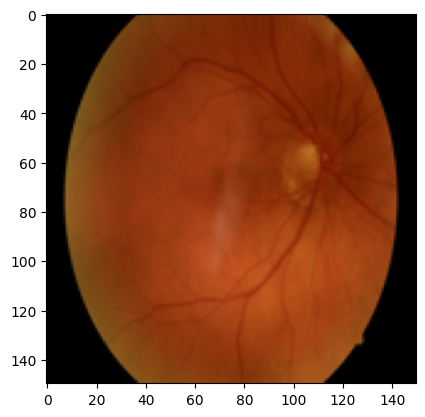

In [181]:
import random
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (SIZE, SIZE, 3)))
print("Label for this image is: ", label[image_number])
print(image_number)

In [182]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [183]:
X_train[0]

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [184]:
X_test.shape

(300, 150, 150, 3)

In [185]:
y_test.shape

(300,)

In [186]:
classes=["NRG","RG"]
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    

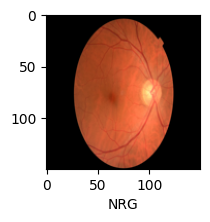

In [187]:
plot_sample(X_train,y_train,27)

In [188]:
X_train = X_train / 255
X_test = X_test / 255

In [189]:
# INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())

# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1))
# model.add(Activation('sigmoid')) 

In [190]:
# model.compile(loss='binary_crossentropy',
#               optimizer='rmsprop',             #also try adam
#               metrics=['accuracy'])

# print(model.summary())  

In [191]:
# history = model.fit(X_train, 
#                          y_train, 
#                          batch_size = 64, 
#                          verbose = 1, 
#                          epochs = 30,      
#                          validation_data=(X_test,y_test),
#                          shuffle = False
#                      )

In [192]:
# n = random.randint(0, len(X_test)-1)
# n = 30
# img = X_test[n]
# plt.imshow(img)
# input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
# print("The prediction for this image is: ", model.predict(input_img))
# print("The actual label for this image is: ", y_test[n])

In [193]:
cnn = models.Sequential([
    #cnn-1 layers
    layers.Conv2D(filters=32, activation="relu", kernel_size=(3,3),input_shape=(SIZE,SIZE,3)),
    layers.MaxPooling2D((2,2)),
    
    #cnn-2 layers
    layers.Conv2D(filters=64, activation="relu", kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense layers   
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])


cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
38/38 [==============================] - 18s 469ms/step - loss: 0.3286 - accuracy: 0.9350
Epoch 2/30
38/38 [==============================] - 17s 448ms/step - loss: 0.1623 - accuracy: 0.9617
Epoch 3/30
38/38 [==============================] - 20s 529ms/step - loss: 0.1512 - accuracy: 0.9617
Epoch 4/30
38/38 [==============================] - 18s 474ms/step - loss: 0.1562 - accuracy: 0.9617
Epoch 5/30
38/38 [==============================] - 17s 455ms/step - loss: 0.1512 - accuracy: 0.9617
Epoch 6/30
38/38 [==============================] - 17s 454ms/step - loss: 0.1413 - accuracy: 0.9608
Epoch 7/30
38/38 [==============================] - 17s 452ms/step - loss: 0.1335 - accuracy: 0.9617
Epoch 8/30
38/38 [==============================] - 17s 450ms/step - loss: 0.1260 - accuracy: 0.9633
Epoch 9/30
38/38 [==============================] - 17s 454ms/step - loss: 0.1463 - accuracy: 0.9550
Epoch 10/30
38/38 [==============================] - 17s 453ms/step - loss: 0.1360 - accura

In [194]:
cnn.evaluate(X_test,y_test)

10/10 [==============================] - 1s 103ms/step - loss: 0.3844 - accuracy: 0.9767


[0.38438278436660767, 0.9766666889190674]

21
58
99
102
116
287
294


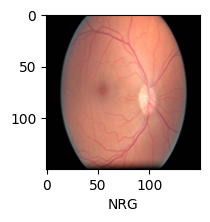

In [195]:
plot_sample(X_test,y_test,52)
for i in range(len(X_test)):
    if classes[y_test[i]] == 'RG':
        print(i)
    else:
        continue

In [196]:
y_predict=cnn.predict(X_test)
y_classes = [np.argmax(i) for i in y_predict]

10/10 [==============================] - 1s 109ms/step


In [200]:
classes[y_classes[21]]

'NRG'